# Graph maker

## Context

In this notebook some figures are generated using the matplotlib library

## Output

- Figure of expected error probability vs number of photons

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import binom
from scipy.optimize import curve_fit

In [3]:
# some functions

def Perr_dEspagnat(N):
    # Expected error probability using d'Espagnat's solution for a total number of N photons
    return binom(N,N/2)/2**(N+1)

## Expected error probability vs number of photons for the 2BP

In [4]:
# load data

Perr = []
Nrange = np.arange(2, 12+1, 2)

for N in Nrange:
    Perr += [np.loadtxt("data/perr_md_2bp_num_N{:d}.txt".format(N))*1]

In [5]:
# fit Helstrom bound

def f(x, a, b, c):
    return a*x**b*np.exp(-c*x)

params, _ = curve_fit(f, Nrange, Perr, (1,1,1))

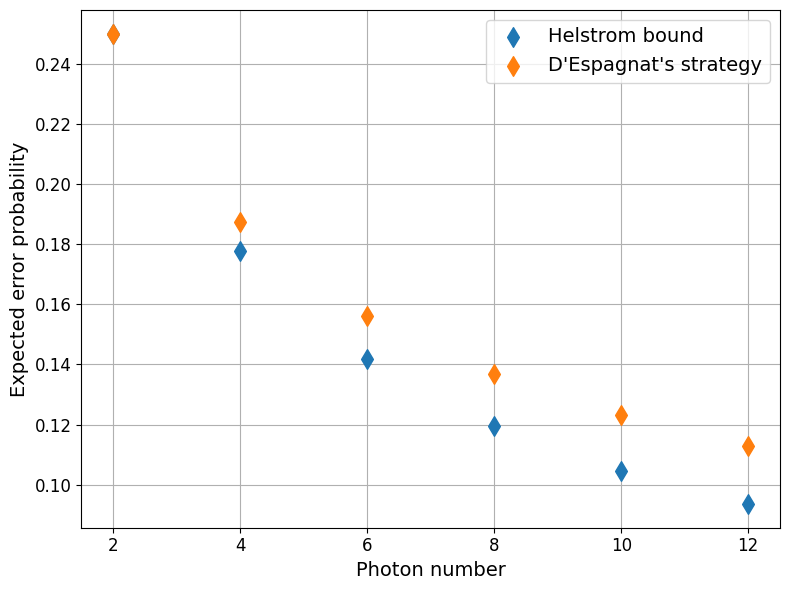

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(Nrange, Perr, marker='d', s=100, zorder=3, label="Helstrom bound")
plt.scatter(Nrange, Perr_dEspagnat(Nrange), marker='d', s=100, zorder=3, label="D'Espagnat's strategy")
plt.ylabel(r"Expected error probability",fontsize=14)
plt.xlabel("Photon number",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.tight_layout()
plt.legend(fontsize=14)
plt.savefig('figures/Perr_vs_N.jpg', dpi=300)
plt.show()

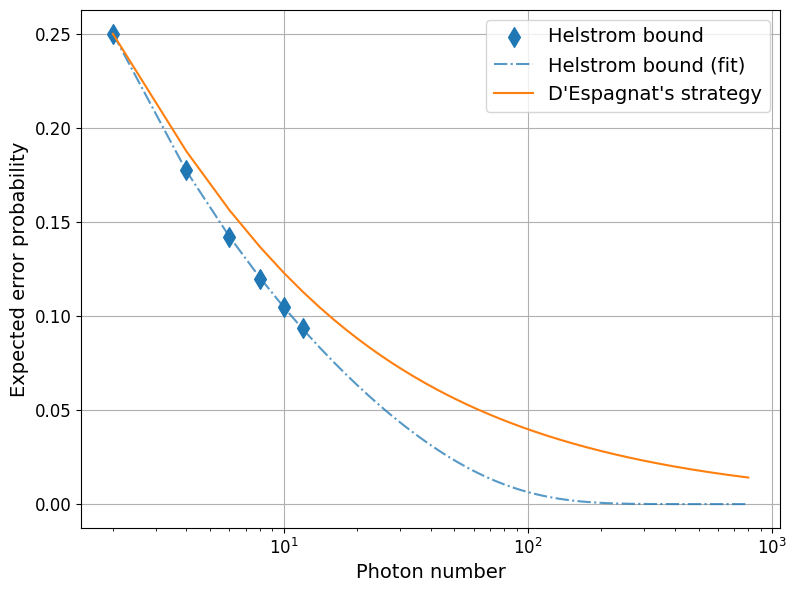

In [12]:
x = np.arange(2,1e3-200,2)
plt.figure(figsize=(8,6))
plt.scatter(Nrange, Perr, marker='d', s=100, zorder=3, label="Helstrom bound")
plt.plot(x, f(x,*params), ls='-.', alpha = 0.75, label="Helstrom bound (fit)")
plt.plot(x, Perr_dEspagnat(x), zorder=3, label="D'Espagnat's strategy")
plt.ylabel(r"Expected error probability",fontsize=14)
plt.xlabel("Photon number",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.tight_layout()
plt.legend(fontsize=14)
plt.xscale('log')
plt.savefig('figures/Perr_vs_N_fit.jpg', dpi=300)
plt.show()